In [85]:
import numpy as np
import pandas as pd
import requests
import csv
from pytrends.request import TrendReq

state = "West Bengal"
pparties = ["AITC","NDA","Sanyukta Morcha"] #names of political parties in the state
cols_to_use = [1,4,7,10]
#Data taken from Wiki for eg: https://en.wikipedia.org/wiki/2019_Indian_general_election_in_Uttar_Pradesh
data_cand2 = pd.read_table("table-6.csv",sep=",",skiprows=2,usecols=cols_to_use,names=np.append(["Dist"],pparties))

In [110]:
data_cand=data_cand2.copy();

In [132]:
np.where(data_cand['Dist']=='Haroa');
data_cand

,Dist,AITC,NDA,Sanyukta Morcha
0,Cooch Behar district,Cooch Behar district,Cooch Behar district,Cooch Behar district
1,Mekliganj,Paresh Chandra Adhikary,Dadhiram Ray,Gobindo Ray
2,Mathabhanga,Girindra Nath Barman,Sushil Barman,Ashok Barman
3,Cooch Behar Uttar,Binay Krishna Barman,Sukumar Roy,Nagendra Nath Ray
4,Cooch Behar Dakshin,Avijit Dey Bhowmik,Nikhil Ranjan Dey,Akshay Thakur
5,Sitalkuchi,Partha Pratim Ray,Baren Chandra Barman,Sudhangsu Pramanik
6,Sitai,Jagadish Chandra Barma Basunia,Dipak Kumar Roy,Keshab Chandra Roy
7,Dinhata,Udayan Guha,Nisith Pramanik,Abdul Rauf
8,Natabari,Rabindra Nath Ghosh,Mihir Goswami,Akik Hasan
9,Tufanganj,Pranab Kumar Dey,Maloti Rava Roy,Rabin Roy


In [60]:
# number of districts
n_dist = data_cand.shape[0] 
n_dist

319

In [61]:
def get_details(can1,can2,can3):

    # Login to Google. Only need to run this once, the rest of requests will use the same session.
    pytrend = TrendReq()
    
    if(len(can1)<5):
        can1 = str(53453623426*np.random.random())#search term is random
    if(len(can2)<5):
        can2 = str(53453623426*np.random.random())#search term is random
    if(len(can3)<5):
        can3 = str(53453623426*np.random.random())#search term is random
    
    print "searching for:",[can1,can2,can3]
    # Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
    #load last 3 months search data
    pytrend.build_payload(kw_list=[can1,can2,can3],cat=0,geo='IN',timeframe='today 3-m')
    # Interest by Region
    interest_by_region_df = pytrend.interest_by_region(resolution="IN")
    d=interest_by_region_df.to_dict()
    #print d

    return [d[can1][state],d[can2][state],d[can3][state]]

In [98]:
winning_party = ["none"]*n_dist
winning_party_2 = ["none"]*n_dist
is_equal_alert = ["none"]*n_dist


score_p1 = [0]*n_dist
score_p2 = [0]*n_dist
score_p3 = [0]*n_dist
score_p4 = [0]*n_dist


for i in xrange(n_dist):
        if(data_cand["Dist"][i]!= data_cand['AITC'][i] ):
            print data_cand["Dist"][i]#," canditates:", data_can["TMC"][i],data_can["BJP"][i],data_can["INC"][i],data_can["CPIM"][i]
        #trend_URL = (data_cand["TMC"][i],data_cand["BJP"][i],data_cand["INC"][i],data_cand["CPIM"][i])
        #print trend_URL
        #get_score(trend_URL)
            sc1,sc2,sc3 = get_details(data_cand[pparties[0]][i],data_cand[pparties[1]][i],data_cand[pparties[2]][i])
            print pparties[0],data_cand[pparties[0]][i], sc1
            print pparties[1],data_cand[pparties[1]][i],sc2
            print pparties[2],data_cand[pparties[2]][i],sc3
            #print pparties[3],data_cand[pparties[3]][i],sc4
        
            score_arr = [sc1,sc2,sc3]
            arg_sorted = np.argsort(-np.asarray(score_arr))# decreasing sort
        
        #win_idx = score_arr.index(score_arr[0])
        
            winning_party[i] = (pparties[arg_sorted[0]])#win_idx])
            winning_party_2[i] = (pparties[arg_sorted[1]])
            if(np.abs(score_arr[arg_sorted[0]]/score_arr[arg_sorted[1]]-1)<0.3):
                print "close contest"
                is_equal_alert[i] = 1
            else:
                is_equal_alert[i] = 0
            score_p1[i] = sc1
            score_p2[i] = sc2
            score_p3[i] = sc3

        
        


Mekliganj
searching for: ['Paresh Chandra Adhikary', 'Dadhiram Ray', 'Gobindo Ray']
AITC Paresh Chandra Adhikary 100
NDA Dadhiram Ray 0
Sanyukta Morcha Gobindo Ray 0
Mathabhanga


/opt/intel/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in long_scalars


searching for: ['Girindra Nath Barman', 'Sushil Barman', 'Ashok Barman']
AITC Girindra Nath Barman 0
NDA Sushil Barman 0
Sanyukta Morcha Ashok Barman 0
Cooch Behar Uttar
searching for: ['Binay Krishna Barman', 'Sukumar Roy', 'Nagendra Nath Ray']
AITC Binay Krishna Barman 0
NDA Sukumar Roy 100
Sanyukta Morcha Nagendra Nath Ray 0
Cooch Behar Dakshin
searching for: ['Avijit Dey Bhowmik', 'Nikhil Ranjan Dey', 'Akshay Thakur']
AITC Avijit Dey Bhowmik 0
NDA Nikhil Ranjan Dey 0
Sanyukta Morcha Akshay Thakur 0
Sitalkuchi
searching for: ['Partha Pratim Ray', 'Baren Chandra Barman', 'Sudhangsu Pramanik']
AITC Partha Pratim Ray 0
NDA Baren Chandra Barman 0
Sanyukta Morcha Sudhangsu Pramanik 0
Sitai
searching for: ['Jagadish Chandra Barma Basunia', 'Dipak Kumar Roy', 'Keshab Chandra Roy']
AITC Jagadish Chandra Barma Basunia 0
NDA Dipak Kumar Roy 0
Sanyukta Morcha Keshab Chandra Roy 0
Dinhata
searching for: ['Udayan Guha', 'Nisith Pramanik', 'Abdul Rauf']
AITC Udayan Guha 50
NDA Nisith Pramanik 50


searching for: ['Md Abdul Ghani', 'S K Jiyauddin', 'Isha Khan Choudhury']
AITC Md Abdul Ghani 0
NDA S K Jiyauddin 0
Sanyukta Morcha Isha Khan Choudhury 100
Baisnabnagar
searching for: ['Chandana Sarkar', 'Swadhin Kumar Sarkar', 'Azizul Haque']
AITC Chandana Sarkar 0
NDA Swadhin Kumar Sarkar 0
Sanyukta Morcha Azizul Haque 100
Farakka
searching for: ['Monirul Islam', 'Hemanta Ghosh', 'Mainul Haque']
AITC Monirul Islam 100
NDA Hemanta Ghosh 0
Sanyukta Morcha Mainul Haque 0
Samserganj
searching for: ['Amirul Islam', 'Milan Ghosh', 'Modassar Hossain']
AITC Amirul Islam 0
NDA Milan Ghosh 0
Sanyukta Morcha Modassar Hossain 0
Suti
searching for: ['Emani Biswas', 'Kaushik Das', 'Humayun Roja']
AITC Emani Biswas 0
NDA Kaushik Das 0
Sanyukta Morcha Humayun Roja 0
Jangipur
searching for: ['Jakir Hossain', 'Sujit Das', 'Pradip Nandi']
AITC Jakir Hossain 89
NDA Sujit Das 11
Sanyukta Morcha Pradip Nandi 0
Raghunathganj
searching for: ['Akhruzzaman', 'Golam Modarsha', 'Abdul Kasem Biswas']
AITC Akhruz

AITC Subodh Adhikary 0
NDA Subhranshu Roy 100
Sanyukta Morcha Sukanta Rakshit 0
Naihati
searching for: ['Partha Bhowmick', 'Phalguni Patra', 'Indrani Kundu Mukherjee']
AITC Partha Bhowmick 100
NDA Phalguni Patra 0
Sanyukta Morcha Indrani Kundu Mukherjee 0
Bhatpara
searching for: ['Jitendra Shaw', 'Pawan Singh', 'Dharmendra Shaw']
AITC Jitendra Shaw 0
NDA Pawan Singh 100
Sanyukta Morcha Dharmendra Shaw 0
Jagatdal
searching for: ['Somnath Shyam', 'Arindam Bhattacharya', 'Nimai Saha']
AITC Somnath Shyam 5
NDA Arindam Bhattacharya 95
Sanyukta Morcha Nimai Saha 0
Noapara
searching for: ['Manju Basu', 'Sunil Singh', 'Suvankar Sarkar']
AITC Manju Basu 0
NDA Sunil Singh 100
Sanyukta Morcha Suvankar Sarkar 0
Barrackpore
searching for: ['Raj Chakraborty', 'Dr. Candramani Shukla', 'Debasish Bhowmick']
AITC Raj Chakraborty 100
NDA Dr. Candramani Shukla 0
Sanyukta Morcha Debasish Bhowmick 0
Khardaha
searching for: ['Kajal Sinha', 'Shilbhadra Dutta', 'Debojyoti Das']
AITC Kajal Sinha 69
NDA Shilbhad

TypeError: object of type 'float' has no len()

In [99]:
data_cand3 = data_cand.copy()

In [100]:
data_cand3.insert(loc=0+1, column='Winning Party', value=winning_party)

data_cand3.insert(loc=2+1, column='Score:'+pparties[0], value=score_p1)
data_cand3.insert(loc=4+1, column='Score:'+pparties[1], value=score_p2)
data_cand3.insert(loc=6+1, column='Score:'+pparties[2], value=score_p3)
data_cand3.insert(loc=6+2, column='Winning Party 2', value=winning_party_2)
data_cand3.insert(loc=6+3, column='Is close contest?', value=is_equal_alert)


In [101]:
data_cand3

,Dist,Winning Party,AITC,Score:AITC,NDA,Score:NDA,Sanyukta Morcha,Score:Sanyukta Morcha,Winning Party 2,Is close contest?
0,Cooch Behar district,none,Cooch Behar district,0,Cooch Behar district,0,Cooch Behar district,0,none,none
1,Mekliganj,AITC,Paresh Chandra Adhikary,100,Dadhiram Ray,0,Gobindo Ray,0,NDA,0
2,Mathabhanga,AITC,Girindra Nath Barman,0,Sushil Barman,0,Ashok Barman,0,NDA,0
3,Cooch Behar Uttar,NDA,Binay Krishna Barman,0,Sukumar Roy,100,Nagendra Nath Ray,0,AITC,0
4,Cooch Behar Dakshin,AITC,Avijit Dey Bhowmik,0,Nikhil Ranjan Dey,0,Akshay Thakur,0,NDA,0
5,Sitalkuchi,AITC,Partha Pratim Ray,0,Baren Chandra Barman,0,Sudhangsu Pramanik,0,NDA,0
6,Sitai,AITC,Jagadish Chandra Barma Basunia,0,Dipak Kumar Roy,0,Keshab Chandra Roy,0,NDA,0
7,Dinhata,AITC,Udayan Guha,50,Nisith Pramanik,50,Abdul Rauf,0,NDA,1
8,Natabari,NDA,Rabindra Nath Ghosh,0,Mihir Goswami,100,Akik Hasan,0,AITC,0
9,Tufanganj,AITC,Pranab Kumar Dey,0,Maloti Rava Roy,0,Rabin Roy,0,NDA,0


In [104]:
data_cand3.to_csv('Constitunecy_trends_WB.csv')

Plotting:

In [103]:
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [82]:
# downloaded from https://data.biogeo.ucdavis.edu/data/gadm3.6/gpkg/gadm36_IND_gpkg.zip
data = gpd.read_file("./gadm36_IND.gpkg", driver='GPKG')

In [83]:
#Get Uttar Pradesh Coordinates 
#https://gis.stackexchange.com/questions/282681/filter-a-geopandas-dataframe-for-points-within-a-specific-country
wb = data.ix[data['NAME_1']=='West Bengal']

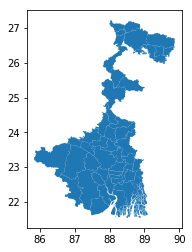

In [84]:
wb.plot();plt.show(); #check state plot

In [88]:
wb['NAME_2'].values;

In [89]:
nconst= wb.shape[0];print nconst #number of constituency

53


In [93]:
wb2 = wb.copy().sort_values("NAME_2")
data_pred = pd.read_table("Constitunecy_trends_WB.csv",sep=",",skiprows=1,usecols=[1,2,5],names=["EC","WIN_P","EC_NUM"])
wpar=0
EC_reg_idx = data_pred["EC_NUM"].values #EC_NUM from analysis data this will be replaced
PC_reg_idx=wb2['NAME_2'].values; #codes from Map data


In [94]:
data_pred

,EC,WIN_P,EC_NUM
0,Cooch Behar district,none,Cooch Behar district
1,Mekliganj,AITC,Dadhiram Ray
2,Mathabhanga,AITC,Sushil Barman
3,Cooch Behar Uttar,AITC,Sukumar Roy
4,Cooch Behar Dakshin,AITC,Nikhil Ranjan Dey
5,Sitalkuchi,AITC,Baren Chandra Barman
6,Sitai,AITC,Dipak Kumar Roy
7,Dinhata,AITC,Nisith Pramanik
8,Natabari,AITC,Mihir Goswami
9,Tufanganj,AITC,Maloti Rava Roy


In [97]:
wb2['NAME_2'].values

array([u'Alipurduar', u'Bankura', u'Bankura', u'Barddhaman', u'Barddhaman',
       u'Barddhaman', u'Barddhaman', u'Barddhaman', u'Birbhum', u'Birbhum',
       u'Birbhum', u'Dakshin Dinajpur', u'Darjiling', u'Darjiling',
       u'Darjiling', u'Darjiling', u'Haora', u'Haora', u'Hugli', u'Hugli',
       u'Hugli', u'Hugli', u'Jalpaiguri', u'Koch Bihar', u'Koch Bihar',
       u'Koch Bihar', u'Koch Bihar', u'Koch Bihar', u'Kolkata', u'Maldah',
       u'Murshidabad', u'Murshidabad', u'Murshidabad', u'Murshidabad',
       u'Nadia', u'Nadia', u'Nadia', u'North 24 Parganas',
       u'North 24 Parganas', u'North 24 Parganas', u'North 24 Parganas',
       u'North 24 Parganas', u'Pashchim Medinipur', u'Pashchim Medinipur',
       u'Pashchim Medinipur', u'Purba Medinipur', u'Purba Medinipur',
       u'Puruliya', u'South 24 Parganas', u'South 24 Parganas',
       u'South 24 Parganas', u'Uttar Dinajpur', u'Uttar Dinajpur'], dtype=object)

In [43]:

#approximate string matching

from difflib import SequenceMatcher as SM

d0 = data_pred['EC'].values #data where we want to add constituency numbers
d1 = wb2['PC_NAME'].values #data of map where we find a match for each constituency
# does not work when d0 and d1 are interchanged because of 1st word match breaking
match_loc = np.zeros(n_dist)

for idx in xrange(0,n_dist):
    mfound = 0
    s1=d0[idx].split();
    match_idx2 = np.zeros(n_dist)

    for jdx_1,s1_0 in enumerate(s1):
        
        #print "Matchning ",s1_0

        for idx2 in xrange(0,n_dist):
            
            s2=d1[idx2].split()
            #create a matrix of ratios len(s1) and len(s2)
            match_mat = np.zeros((len(s1),len(s2)))
            
            for jdx_2,s2_0 in enumerate(s2):
                seqMatch = SM(None,s1_0,s2_0).ratio()
                #print "matching: ",s1_0,s2_0,seqMatch
                
                match_mat[jdx_1,jdx_2] = seqMatch
                #if(seqMatch.ratio()>0.85):
                #   print idx,s1_0,"  :  ",idx2,s2_0
                #    mfound=1
            
        
                #    break
                
            match_idx2[idx2]=np.max(match_mat)
        #print match_idx2
        if(np.max(match_idx2)>0.7):
            idx_match = np.argmax(match_idx2)
            #print idx,d0[idx],d1[idx_match],PC_reg_idx[idx_match]
            match_loc[idx] = PC_reg_idx[idx_match]
            break
        else:
            print  "Match not found for ",s1
            match_loc[idx] = -1

            

    

    

In [44]:
#reset EC_NUM with data from map
data_pred["EC_NUM"] = match_loc
EC_reg_idx = data_pred["EC_NUM"].values #EC_NUM from analysis data
#print data_pred.values

In [46]:
win_party = np.random.randint(1,5,n_dist)*0 # 1=BJP 2=TMC 3=INC 4=CPIM

for idx in xrange(1,n_dist+1): #iterate over the data_set predictions

    wpar = data_pred['WIN_P'][idx-1]
    print wb2['PC_NAME'].values[int(match_loc[idx-1])-1],wpar
    if((wpar==pparties[0])): 
        #print "BJP"
        win_party[idx-1]=1
    elif(wpar==pparties[1]):
        win_party[idx-1]=2
    elif(wpar==pparties[2]):
        win_party[idx-1]=3
    elif(wpar==pparties[3]):
        win_party[idx-1]=4
    else:
        print "Party not found! Please check!"
#print win_party                

Saharanpur UPA
Kairana MGB
Muzaffarnagar MGB
Bijnor MGB
Nagina MGB
Moradabad NDA
Rampur UPA
Sambhal PDA
Amroha UPA
Meerut UPA
Baghpat MGB
Ghaziabad UPA
Gautam Buddha Nagar PDA
Bulandshahr NDA
Aligarh PDA
Hathras MGB
Mathura NDA
Agra UPA
Fatehpur Sikri UPA
Firozabad MGB
Mainpuri MGB
Etah UPA
Budaun MGB
Aonla PDA
Bareilly PDA
Pilibhit MGB
Shahjahanpur NDA
Kheri NDA
Dhaurahra UPA
Sitapur NDA
Hardoi NDA
Misrikh NDA
Unnao UPA
Mohanlalganj NDA
Lucknow NDA
Rae Bareli UPA
Amethi UPA
Sultanpur UPA
Pratapgarh UPA
Farrukhabad UPA
Etawah MGB
Kannauj MGB
Kanpur MGB
Akbarpur UPA
Jalaun MGB
Jhansi NDA
Hamirpur NDA
Banda MGB
Fatehpur Sikri NDA
Kaushambi PDA
Phulpur MGB
Allahabad UPA
Barabanki NDA
Faizabad NDA
Ambedkar Nagar MGB
Bahraich NDA
Kaisarganj NDA
Shrawasti NDA
Gonda MGB
Domriaganj NDA
Basti MGB
Sant Kabir Nagar UPA
Maharajganj MGB
Gorakhpur NDA
Kushi Nagar PDA
Deoria NDA
Bansgaon NDA
Lalganj MGB
Azamgarh MGB
Ghosi MGB
Salempur UPA
Ballia NDA
Jaunpur PDA
Machhlishahr NDA
Ghazipur NDA
Chandauli

In [217]:
color = ['k']*nconst
for i in xrange(nconst):
    if(win_party[i]==1):
        color[i]='orange'
    elif(win_party[i]==2):
        color[i] = 'greenyellow'
    elif(win_party[i]==3):
        color[i] = 'b'
    elif(win_party[i]==4):
        color[i] = 'r'   
    else:
        print "error, party not present"
        
wb2["W_IDX"] = win_party ;
wb2["W_COLOR"] = (win_party-1)/3.0 ;

In [219]:
wb2;

In [237]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    'mycmap', [(0.0, 'orange'),(0.33,'greenyellow'),(0.66,'blue'),(1,'r')])

wb2.plot(column='W_COLOR',cmap = cmap,legend=True,alpha=0.6,edgecolor="black",linewidth='0.5');

custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='greenyellow', lw=4),
                Line2D([0], [0], color='b', lw=4),
               Line2D([0], [0], color='r', lw=4)]

plt.legend(custom_lines, pparties,loc=0)

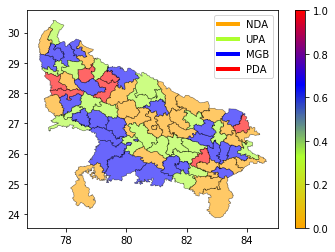

In [238]:
plt.savefig('UP_prediction2.pdf')
plt.show()

In [48]:

print pparties[0],"vote share", len(np.where(win_party==1)[0])*100.0/n_dist, "%"," with ",len(np.where(win_party==1)[0])," seats."
print pparties[1],"vote share", len(np.where(win_party==2)[0])*100.0/n_dist, "%"," with ",len(np.where(win_party==2)[0])," seats."
print pparties[2],"vote share", len(np.where(win_party==3)[0])*100.0/n_dist, "%"," with ",len(np.where(win_party==3)[0])," seats."
print pparties[3],"vote share", len(np.where(win_party==4)[0])*100.0/n_dist, "%"," with ",len(np.where(win_party==4)[0])," seats."

NDA vote share 35.0 %  with  28  seats.
UPA vote share 25.0 %  with  20  seats.
MGB vote share 30.0 %  with  24  seats.
PDA vote share 10.0 %  with  8  seats.
